## Table of Content:

* [Feature_Percent](#feature_percent)


In [1]:
# >>> EDIT ITEMS IN THIS CELL

# Copy and paste the query from VSTS and save to the folder containing this notebook 
filename = "sample_data/product_sample_data_windows.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
# --- Import and attach feature names to stories

df = pd.read_csv(filename, header = 1)
df = df.replace(np.nan, '', regex=True)

feature=df['Title 1'][0]
for i in range(0,len(df)):
    if df['Title 1'][i]=="":
        df['Title 1'][i]= feature;
        
    else:
        feature = df['Title 1'][i]
df=df.rename(columns = {'Title 1':'Feature'}) 

In [4]:
# --- Calculate points per feature

features = df['Feature'].unique()

total_MVP_points_per_feat = []
closed_MVP_points_per_feat = []
percent_MVP_complete = []
feat_iteration_path = []

df['Story Points'] = df[['Story Points']].convert_objects(convert_numeric=True).fillna(0)

for i in range(0,len(features)):
    num_closed_points = int(df[(df['Feature']== features[i])&(df['State']=='Closed')].sum()["Story Points"])
    closed_MVP_points_per_feat.append(num_closed_points)
    
    num_tot_points = int(df[df['Feature']== features[i]].sum()["Story Points"])
    total_MVP_points_per_feat.append(num_tot_points)
    
    if num_tot_points != 0:
        percent = int(round(num_closed_points/num_tot_points*100))
        percent_MVP_complete.append(percent)
    else:
        percent_MVP_complete.append(0)
        
    feat_iteration_path.append(df[(df['Feature']==features[i])&(df['Work Item Type']=='Feature')].iloc[0]['Iteration Path'])
        
# combine into df    
featdf_all = {'Feature':features, '# Story Points': total_MVP_points_per_feat, '# Points Closed': closed_MVP_points_per_feat, '% MVP Complete': percent_MVP_complete, 'Iteration Path': feat_iteration_path}
featdf_all = pd.DataFrame (data = featdf_all)
featdf_all = featdf_all.dropna()


# Include only features with story points
featdf = featdf_all[(featdf_all['# Story Points']>0)]
featdf = featdf[::-1]

In [5]:
### Various dataframes
# df.head() 
# sprintdf.tail()
# MVP_featdf.head()

# Show stories in the feature: df[df['Feature']=='feature1']
df[df['Feature']=='feature1']

,ID,Work Item Type,Feature,Title 2,Title 3,State,Story Points,Iteration Path
0,100,Feature,feature1,,,Closed,0.0,projectName\team1
1,111,User Story,feature1,story1,,Closed,1.0,projectName\team1\Sprint 1
2,112,User Story,feature1,story2,,Closed,1.0,projectName\team1\Sprint 1
3,113,User Story,feature1,story3,,Closed,3.0,projectName\team1\Sprint 1


# MVP Feature  <a class="anchor" id="feature_percent"></a>

% Story Points Complete =  81.82
Total # Story Points =  44
# Remaining Story Points =  8


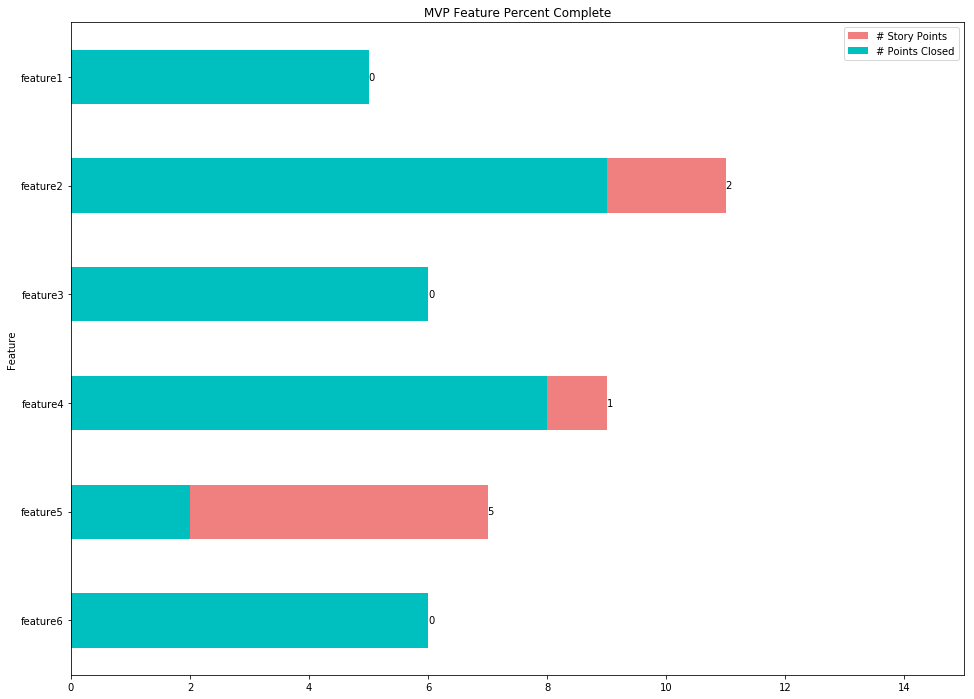

In [6]:
# Define x-axis max value
max_x = featdf['# Story Points'].max()
x_axis_max = (int(max_x/5)+1)*5

# Plot
ax1 = featdf.plot.barh(title="MVP Feature Percent Complete", x="Feature", y= "# Story Points",color='lightcoral', figsize = (16,12));
featdf.plot.barh(x="Feature", y= "# Points Closed", ax=ax1, color='c', width = 0.5);
ax1.set_yticklabels(featdf['Feature'], rotation=0);
ax1.set_xlim(0, x_axis_max);

for i, cards in enumerate(list(featdf['# Story Points'])):
    ax1.annotate(str(cards-featdf['# Points Closed'].iloc[i]), xy = (cards, i), va = "center")

# Number of MVP points
num_mvp = featdf['# Story Points'].sum()
mvp_left = featdf['# Story Points'].sum()-featdf['# Points Closed'].sum()
MVP_percent_complete = featdf['# Points Closed'].sum()/featdf['# Story Points'].sum()*100

print('% Story Points Complete = ', MVP_percent_complete.round(2))
print('Total # Story Points = ', num_mvp) 
print('# Remaining Story Points = ', mvp_left)